In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
l = pd.read_csv("../data/lawrenson_to_1718.csv", usecols=[0, 1, 2, 3, 4])

In [6]:
m = pd.read_csv("../data/merson_to_1718.csv")

In [7]:
m.tail()

,Season,Home,Prediction,Away,Result
1608,1819,West Ham,1-3,Man City,0-4
1609,1819,Tottenham,1-1,Chelsea,3-1
1610,1819,Bournemouth,2-3,Arsenal,1-2
1611,1819,Wolves,3-0,Huddersfield,0-2
1612,1819,Burnley,1-1,Newcastle,1-2


In [8]:
l.tail()

,Season,Home,Prediction,Away,Result
2742,1819,West Ham,0-2,Man City,0-4
2743,1819,Tottenham,2-0,Chelsea,3-1
2744,1819,Bournemouth,2-1,Arsenal,1-2
2745,1819,Wolves,2-0,Huddersfield,0-2
2746,1819,Burnley,1-1,Newcastle,1-2


In [9]:
l.dropna(inplace=True)

In [10]:
m.dropna(inplace=True)

In [11]:
def convert_to_home_away(df):
    df["home_goals_prediction"] = df.Prediction.apply(lambda x: int(x.split("-")[0]))
    df["away_goals_prediction"] = df.Prediction.apply(lambda x: int(x.split("-")[1]))
    df["home_goals_result"] = df.Result.apply(lambda x: int(x.split("-")[0]))
    df["away_goals_result"] = df.Result.apply(lambda x: int(x.split("-")[1]))
    return df

In [12]:
m = convert_to_home_away(m)

In [13]:
l = convert_to_home_away(l)

In [14]:
pred_result = []

for row in l.itertuples():
    if row.home_goals_prediction == row.away_goals_prediction:
        pred_result.append("D")
    else:
        pred_result.append("W")

l["pred_result"] = pred_result

In [15]:
actual_result = []

for row in l.itertuples():
    if row.home_goals_result == row.away_goals_result:
        actual_result.append("D")
    else:
        actual_result.append("W")

l["actual_result"] = actual_result

In [16]:
pred_result = []

for row in m.itertuples():
    if row.home_goals_prediction == row.away_goals_prediction:
        pred_result.append("D")
    else:
        pred_result.append("W")

m["pred_result"] = pred_result

actual_result = []

for row in m.itertuples():
    if row.home_goals_result == row.away_goals_result:
        actual_result.append("D")
    else:
        actual_result.append("W")

m["actual_result"] = actual_result

In [17]:
# United have two names, map to one

In [18]:
m["Home"] = m.Home.apply(lambda x: x.replace("Man Utd", "Man United"))

In [19]:
l["Home"] = l.Home.apply(lambda x: x.replace("Man Utd", "Man United"))

In [20]:
m["Away"] = m.Away.apply(lambda x: x.replace("Man Utd", "Man United"))

In [21]:
l["Away"] = l.Away.apply(lambda x: x.replace("Man Utd", "Man United"))

In [22]:
m["predict_draw_success"] = (m.pred_result == "D") & (m.actual_result == "D")

In [23]:
l["predict_draw_success"] = (l.pred_result == "D") & (l.actual_result == "D")

Percentage of matches that are draws

In [24]:
round(len(l[l.actual_result == "D"]) / len(l), 2)

0.25

Merse success rate at predicting draws

In [25]:
round(len(m[m["predict_draw_success"] == True]) * 100 /len(m[m.pred_result == "D"]))

33

Lawro success rate at predicting draws

In [26]:
round(len(l[l["predict_draw_success"] == True]) * 100 /len(l[l.pred_result == "D"]))

34

lawro percentage draw pick

In [27]:
round(len(l[l.pred_result == "D"])/len(l)*100,0)

25.0

Merse per season

In [28]:
for season in m.Season.unique():
    temp_df = m[m.Season == season]
    print(season)
    print(round(len(temp_df[temp_df["predict_draw_success"] == True]) * 100 /len(temp_df[temp_df.pred_result == "D"])))
    print()

1415
35

1516
36

1617
33

1718
25

1819
29



Lawro per season

In [29]:
for season in l.Season.unique():
    temp_df = l[l.Season == season]
    print(season)
    print(round(len(temp_df[temp_df["predict_draw_success"] == True]) * 100 /len(temp_df[temp_df.pred_result == "D"])))
    print()

1112
29

1213
40

1314
34

1415
30

1516
39

1617
31

1718
34

1819
29



put the two together

In [30]:
df = pd.merge(l, m, how="inner", on=["Season", "Home", "Away"], suffixes=("_l", "_m"))
len(df)

1609

In [31]:
both_pred_draw = len(df[(df.pred_result_l == "D") & (df.pred_result_m == "D")])
both_pred_draw

142

In [32]:
round(both_pred_draw * 100 / len(df), 1)

8.8

In [33]:
correct = len(df[(df.predict_draw_success_l == True) & (df.predict_draw_success_m == True)])
correct

58

Consensus predict draw rate

In [34]:
round(correct * 100 / both_pred_draw, 1)

40.8

consensus predict draw rate per season

In [35]:
for season in df.Season.unique():
    temp_df = df[df.Season == season]
    print(season)
    print(round(len(temp_df[(temp_df.predict_draw_success_l == True) & (temp_df.predict_draw_success_m == True)]) * 100 / len(temp_df[(temp_df.pred_result_l == "D") & (temp_df.pred_result_m == "D")])))
    print()

1415
42

1516
45

1617
45

1718
32

1819
22



Did anything change from the first three seasons to the last two?

In [36]:
df_pre = df[df.Season <= 1617]

In [37]:
df_post = df[df.Season >= 1718]

In [38]:
len(df_pre[(df_pre.pred_result_l == "D") & (df_pre.pred_result_m == "D")])

111

In [39]:
len(df_post[(df_post.pred_result_l == "D") & (df_post.pred_result_m == "D")])

31

In [40]:
len(df_pre[(df_pre.predict_draw_success_l == True) & (df_pre.predict_draw_success_m == True)])

49

In [41]:
len(df_post[(df_post.predict_draw_success_l == True) & (df_post.predict_draw_success_m == True)])

9

In [42]:
from scipy.stats import chi2_contingency

In [43]:
obs = np.array([[49, 62], [9, 22]])

In [44]:
chi2_contingency(obs)

(1.707611512672692, 0.19129555799449768, 1, array([[45.33802817, 65.66197183],
        [12.66197183, 18.33802817]]))

p-value = 0.19, we are not significantly different at the 0.05 level. Carry on!

comparing with odds

In [45]:
results = pd.read_csv("../data/1415_results.csv", parse_dates=["Date"])

In [46]:
results["Season"] = int(1415)

In [47]:
for season in range(15,19):
    f_name = "../data/" + str(season) + str(season + 1) + "_results.csv"
    temp_df = pd.read_csv(f_name, parse_dates=["Date"])
    temp_df["Season"] = int(str(season) + str(season + 1))
    results = results.append(temp_df)

In [48]:
results.columns

Index(['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'AwayTeam', 'B365A', 'B365D',
       'B365H', 'BWA', 'BWD', 'BWH', 'Bb1X2', 'BbAH', 'BbAHh', 'BbAv<2.5',
       'BbAv>2.5', 'BbAvA', 'BbAvAHA', 'BbAvAHH', 'BbAvD', 'BbAvH', 'BbMx<2.5',
       'BbMx>2.5', 'BbMxA', 'BbMxAHA', 'BbMxAHH', 'BbMxD', 'BbMxH', 'BbOU',
       'Date', 'Div', 'FTAG', 'FTHG', 'FTR', 'HC', 'HF', 'HR', 'HS', 'HST',
       'HTAG', 'HTHG', 'HTR', 'HY', 'HomeTeam', 'IWA', 'IWD', 'IWH', 'LBA',
       'LBD', 'LBH', 'PSA', 'PSCA', 'PSCD', 'PSCH', 'PSD', 'PSH', 'Referee',
       'SJA', 'SJD', 'SJH', 'Season', 'VCA', 'VCD', 'VCH', 'WHA', 'WHD',
       'WHH'],
      dtype='object')

In [49]:
odds = results[["HomeTeam", "AwayTeam", "BbMxD", "BbAvD", "Season", "Date"]]

In [50]:
len(odds)

1651

In [51]:
odds.dropna(inplace=True)

/Users/alexandergreen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [52]:
len(odds)/380

4.342105263157895

checking there are no team names different, as we will join on this

In [53]:
np.setdiff1d(odds.HomeTeam.unique(), df.Home.unique())

array([], dtype=object)

In [54]:
np.setdiff1d(df.Home.unique(), odds.HomeTeam.unique() )

array(['Brighton ', 'Burnley ', 'Cardiff ', 'Chelsea ', 'Crystal Palace ',
       'Leicester ', 'Man City ', 'Tottenham ', 'West Ham '], dtype=object)

In [55]:
df["Home"] = df.Home.apply(lambda x: x.strip())

In [56]:
np.setdiff1d(odds.HomeTeam.unique(), df.Home.unique())

array([], dtype=object)

In [57]:
np.setdiff1d(df.Home.unique(), odds.HomeTeam.unique() )

array([], dtype=object)

In [58]:
np.setdiff1d(odds.AwayTeam.unique(), df.Away.unique())

array([], dtype=object)

In [59]:
np.setdiff1d(df.Away.unique(), odds.AwayTeam.unique() )

array([], dtype=object)

In [60]:
df.head()

,Season,Home,Prediction_l,Away,Result_l,home_goals_prediction_l,away_goals_prediction_l,home_goals_result_l,away_goals_result_l,pred_result_l,...,predict_draw_success_l,Prediction_m,Result_m,home_goals_prediction_m,away_goals_prediction_m,home_goals_result_m,away_goals_result_m,pred_result_m,actual_result_m,predict_draw_success_m
0,1415,Arsenal,2-0,West Brom,4-1,2,0,4,1,W,...,False,3-1,4-1,3,1,4,1,W,W,False
1,1415,Aston Villa,2-0,Burnley,0-1,2,0,0,1,W,...,False,2-2,0-1,2,2,0,1,D,W,False
2,1415,Chelsea,2-0,Sunderland,3-1,2,0,3,1,W,...,False,4-0,3-1,4,0,3,1,W,W,False
3,1415,Crystal Palace,1-1,Swansea,1-0,1,1,1,0,D,...,False,2-2,1-0,2,2,1,0,D,W,False
4,1415,Everton,2-1,Tottenham,0-1,2,1,0,1,W,...,False,3-1,0-1,3,1,0,1,W,W,False


In [61]:
odds.head()

,HomeTeam,AwayTeam,BbMxD,BbAvD,Season,Date
0,Arsenal,Crystal Palace,6.70,5.96,1415,2014-08-16
1,Leicester,Everton,3.45,3.32,1415,2014-08-16
2,Man United,Swansea,5.50,4.96,1415,2014-08-16
3,QPR,Hull,3.40,3.18,1415,2014-08-16
4,Stoke,Aston Villa,3.50,3.38,1415,2014-08-16


In [62]:
df_odds = pd.merge(df, odds, 
                   left_on=["Home", "Away", "Season"], 
                   right_on=["HomeTeam", "AwayTeam", "Season"], 
                   how="inner")

In [63]:
len(df_odds)

1609

In [64]:
df_both_pick = df_odds[(df_odds.pred_result_l == "D") & (df_odds.pred_result_m == "D")]

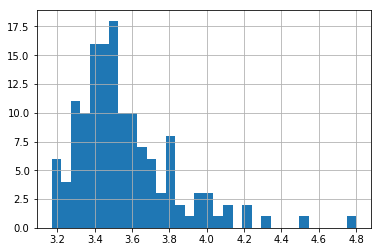

In [65]:
df_both_pick.BbMxD.hist(bins=32)

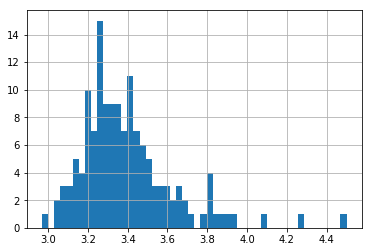

In [66]:
df_both_pick.BbAvD.hist(bins=50)

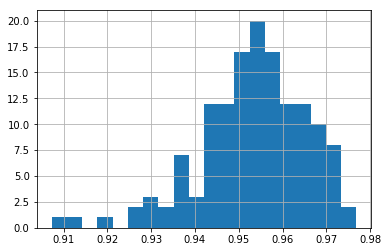

In [67]:
(df_both_pick.BbAvD / df_both_pick.BbMxD).hist(bins=20)

mean, std for max and average odds on the draw on matches that both picked

In [68]:
round(df_both_pick.BbMxD.mean(), 2)

3.56

In [69]:
round(df_both_pick.BbAvD.mean(), 2)

3.39

In [70]:
np.std(df_both_pick.BbMxD)

0.26146600416699023

In [71]:
np.std(df_both_pick.BbAvD)

0.23477267871812854

In [72]:
np.std(df_both_pick[df_both_pick.BbMxD < 3.8].BbMxD)

0.139041637093836

In [73]:
starting_money = 1000
percentage_stake = 0.1

Past performance calcs

Using Constant Percentage Stake

52319.640999999974

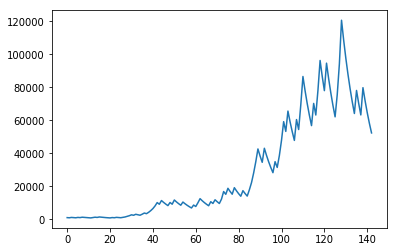

In [74]:
money = starting_money
money_history = [money]
longest_winning_streak = 0
longest_losing_streak = 0
current_winning_streak = 0
current_losing_streak = 0
total_staked = 0
total_won = 0

for row in df_both_pick.itertuples():
    stake = round(money * percentage_stake, -1)
    money -= stake
    total_staked += stake
    if row.predict_draw_success_l and row.predict_draw_success_m:
        money += stake * row.BbMxD * 0.99
        total_won += stake * row.BbMxD * 0.99
        current_winning_streak += 1
        current_losing_streak = 0
    else:
        current_losing_streak += 1
        current_winning_streak = 0
    if current_winning_streak > longest_winning_streak:
        longest_winning_streak = current_winning_streak
    if current_losing_streak > longest_losing_streak:
        longest_losing_streak = current_losing_streak
    
    money_history.append(money)
    

plt.plot(money_history)
money_history[-1]

In [75]:
min(money_history)

821.8860000000004

In [76]:
max(money_history)

120591.98199999997

In [77]:
money_history.index(max(money_history))

128

In [78]:
total_won / total_staked

1.123781092619392

Using Kelly Criterion

In [79]:
starting_money = 1000
prob_winning = 0.417 # assume consant, but may fluctuate
ratio_of_max = 0.99 # percentage of max draw odds we can get

59623.54999999999

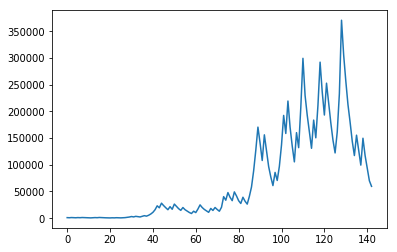

In [81]:
money = starting_money
money_history = [money]

total_staked = 0
total_won = 0

for row in df_both_pick.itertuples():
    kelly = ((prob_winning * row.BbMxD * ratio_of_max) - 1) / ((row.BbMxD * ratio_of_max) - 1)
    stake = round(money * kelly, -1)
    money -= stake
    total_staked += stake
    if row.predict_draw_success_l and row.predict_draw_success_m:
        money += stake * row.BbMxD * ratio_of_max
        total_won += stake * row.BbMxD * ratio_of_max

    
    money_history.append(money)
    

plt.plot(money_history)
money_history[-1]

In [107]:
min(money_history)

469.73199999999997

In [108]:
max(money_history)

370612.511

In [109]:
money_history.index(max(money_history))

128

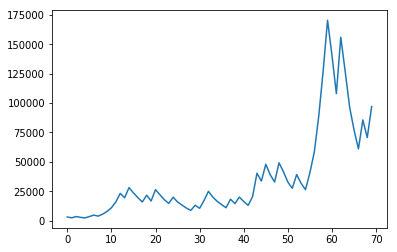

In [77]:
plt.plot(money_history[30:100])

In [117]:
longest_losing_streak

6

In [118]:
longest_winning_streak

5

assume can't get best odds, see what 0.98 looks like

Looks like AvD and 0.95 are roughly equal

try taking out biggest 10% of odds (don't make them losses, just ignore)

In [126]:
df_both_pick.BbAvD.quantile(0.9)

3.688

11756.499999999995

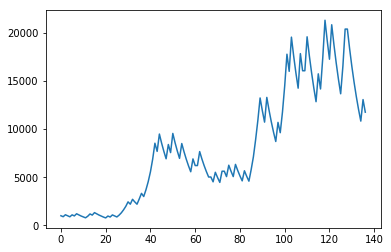

In [76]:
money = starting_money
money_history = [money]
for row in df_both_pick.itertuples():
    stake = round(money * percentage_stake, -1)
    money -= stake
    if row.predict_draw_success_l and row.predict_draw_success_m:
        if row.BbAvD < 3.65:
            money += stake * row.BbAvD
        else:
            money += stake
    money_history.append(money)

plt.plot(money_history)
money_history[-1]

Even Assuming average odds and missing out on top 10 largest wins, we make 12x in 4 seasons

That's an average of tripling bank each season. Jesus

In [79]:
round(100 * (df_both_pick.BbAvD / df_both_pick.BbMxD).mean(), 0)

95.0

Average is roughly 95% of max. 

If above 3.4, definitely take it

look only at last season

In [77]:
df_both_pick_1718 = df_both_pick[df_both_pick.Season == 1718]

In [80]:
ratio_of_max = 1.0

610.0999999999999

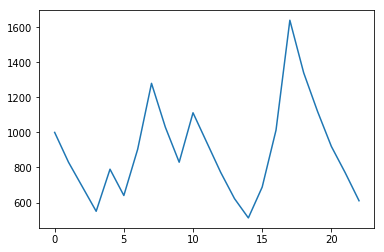

In [81]:
money = starting_money
money_history = [money]
for row in df_both_pick_1718.itertuples():
    kelly = ((prob_winning * row.BbMxD * ratio_of_max) - 1) / ((row.BbMxD * ratio_of_max) - 1)
    stake = round(money * kelly, -1)
    money -= stake
    if row.predict_draw_success_l and row.predict_draw_success_m:
        money += stake * row.BbMxD
    money_history.append(money)
    

plt.plot(money_history)
money_history[-1]

848.6750000000002

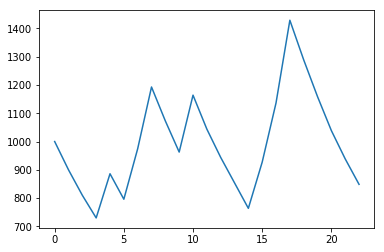

In [83]:
money = starting_money
money_history = [money]
for row in df_both_pick_1718.itertuples():
    stake = round(money * percentage_stake, -1)
    money -= stake
    if row.predict_draw_success_l and row.predict_draw_success_m:
        money += stake * row.BbMxD * 0.95
    money_history.append(money)

plt.plot(money_history)
money_history[-1]

679.5000000000002

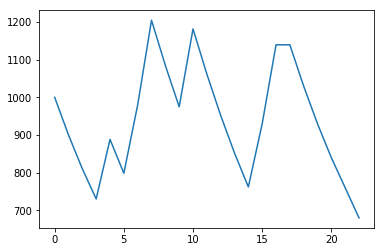

In [83]:
money = starting_money
money_history = [money]
for row in df_both_pick_1718.itertuples():
    stake = round(money * percentage_stake, -1)
    money -= stake
    if row.predict_draw_success_l and row.predict_draw_success_m:
        if row.BbAvD < 3.65:
            money += stake * row.BbAvD
        else:
            money += stake
    money_history.append(money)

plt.plot(money_history)
money_history[-1]

only fails if miss out on big wins

How stable is their picking success?

In [127]:
success_rate = []
for i in range(1, len(df_both_pick)):
    picks_so_far = i
    df_so_far = df_both_pick.iloc[:i]
    successes_so_far = len(df_so_far[df_so_far.predict_draw_success_l & df_so_far.predict_draw_success_m])
    rate_so_far = successes_so_far / picks_so_far
    success_rate.append(rate_so_far)

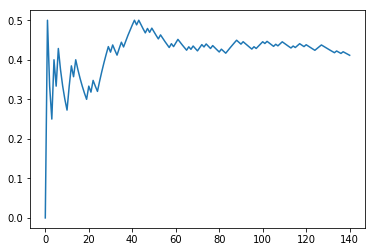

In [128]:
plt.plot(success_rate)

In [129]:
len(success_rate)

141

In [130]:
np.mean(success_rate[0:int(len(success_rate)/2)])

0.4050886941452581

In [131]:
np.mean(success_rate[int(len(success_rate)/2):])

0.43211809521544603

In [132]:
np.mean(success_rate[40:92])

0.44619326408693694

In [133]:
np.mean(success_rate[92:])

0.4319324455759957

In [134]:
np.mean(success_rate[60:72])

0.43391193056021976

In [135]:
np.mean(success_rate[72:])

0.43227962309381907

In [83]:
for i in success_rate[40:]:
    print(i)

0.4878048780487805
0.5
0.4883720930232558
0.5
0.4888888888888889
0.4782608695652174
0.46808510638297873
0.4791666666666667
0.46938775510204084
0.48
0.47058823529411764
0.46153846153846156
0.4528301886792453
0.46296296296296297
0.45454545454545453
0.44642857142857145
0.43859649122807015
0.43103448275862066
0.4406779661016949
0.43333333333333335
0.4426229508196721
0.45161290322580644
0.4444444444444444
0.4375
0.4307692307692308
0.42424242424242425
0.43283582089552236
0.4264705882352941
0.43478260869565216
0.42857142857142855
0.4225352112676056
0.4305555555555556
0.4383561643835616
0.43243243243243246
0.44
0.4342105263157895
0.42857142857142855
0.4358974358974359
0.43037974683544306
0.425
0.41975308641975306
0.4268292682926829
0.42168674698795183
0.4166666666666667
0.4235294117647059
0.43023255813953487
0.4367816091954023
0.4431818181818182
0.449438202247191
0.4444444444444444
0.43956043956043955
0.44565217391304346
0.44086021505376344
0.43617021276595747
0.43157894736842106
0.42708333333

(0.4, 0.52)

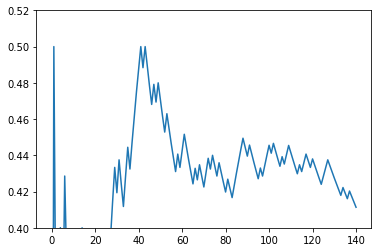

In [136]:
plt.plot(success_rate)
plt.ylim(0.40, 0.52)

In [137]:
from statsmodels.tsa.stattools import adfuller

/Users/alexandergreen/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [140]:
result = adfuller(success_rate[80:])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.608327
p-value: 0.479409
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593


(array([ 2.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  6.,  8.,  9., 17., 20.,
        18.,  8.,  7.,  2.,  1.,  3.,  1.,  2.,  1.,  3.,  0.,  3.,  0.,
         2.]),
 array([0.31818182, 0.32272727, 0.32727273, 0.33181818, 0.33636364,
        0.34090909, 0.34545455, 0.35      , 0.35454545, 0.35909091,
        0.36363636, 0.36818182, 0.37272727, 0.37727273, 0.38181818,
        0.38636364, 0.39090909, 0.39545455, 0.4       , 0.40454545,
        0.40909091, 0.41363636, 0.41818182, 0.42272727, 0.42727273,
        0.43181818, 0.43636364, 0.44090909, 0.44545455, 0.45      ,
        0.45454545, 0.45909091, 0.46363636, 0.46818182, 0.47272727,
        0.47727273, 0.48181818, 0.48636364, 0.49090909, 0.49545455,
        0.5       ]),
 <a list of 40 Patch objects>)

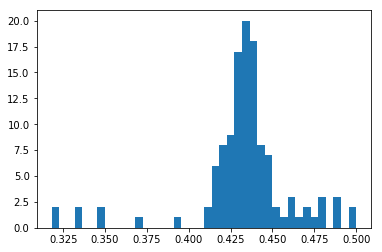

In [141]:
plt.hist(success_rate[20:], bins=40)

In [142]:
df_l_pick = df_odds[df_odds.pred_result_l == "D"]

5303.998999999999

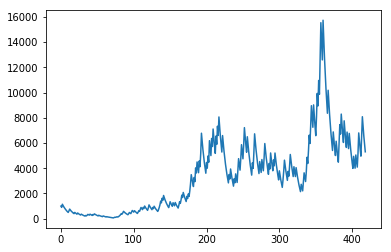

In [146]:
money = starting_money
money_history = [money]
lawro_staked = 0
lawro_won = 0
for row in df_l_pick.itertuples():
    stake = round(money * percentage_stake, -1)
    lawro_staked += stake
    money -= stake
    if row.predict_draw_success_l:
        money += stake * row.BbMxD * 0.99
        lawro_won += stake * row.BbMxD * 0.99
        
    money_history.append(money)
    

plt.plot(money_history)
money_history[-1]

In [147]:
lawro_won/lawro_staked

1.03055949304175

In [83]:
max(money_history)

15728.005

In [144]:
df_m_pick = df_odds[df_odds.pred_result_m == "D"]

2757.051999999998

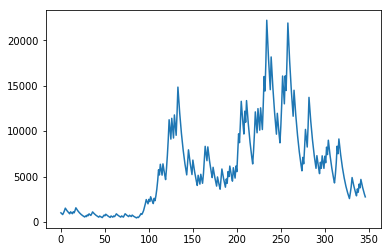

In [150]:
money = starting_money
money_history = [money]
merse_staked = 0
merse_won = 0
for row in df_m_pick.itertuples():
    stake = round(money * percentage_stake, -1)
    money -= stake
    merse_staked += stake
    if row.predict_draw_success_m:
        money += stake * row.BbMxD *0.99
        merse_won += stake * row.BbMxD *0.99
    money_history.append(money)
    

plt.plot(money_history)
money_history[-1]

In [151]:
merse_won / merse_staked

1.008532692307692

In [152]:
max(money_history)

22200.181000000004

In [153]:
success_rate_l = []
for i in range(1, len(df_l_pick)):
    picks_so_far = i
    df_so_far = df_l_pick.iloc[:i]
    successes_so_far = len(df_so_far[df_so_far.predict_draw_success_l])
    rate_so_far = successes_so_far / picks_so_far
    success_rate_l.append(rate_so_far)

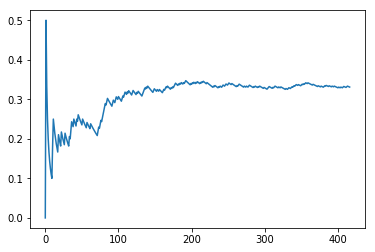

In [154]:
plt.plot(success_rate_l)

In [155]:
result = adfuller(success_rate_l[150:])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.941561
p-value: 0.040724
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573


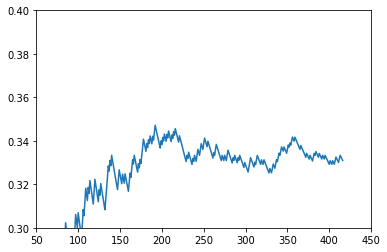

In [156]:
plt.ylim(0.30, 0.4)
plt.xlim(50,450)
plt.plot(success_rate_l)

In [157]:
success_rate_m = []
for i in range(1, len(df_m_pick)):
    picks_so_far = i
    df_so_far = df_m_pick.iloc[:i]
    successes_so_far = len(df_so_far[df_so_far.predict_draw_success_m])
    rate_so_far = successes_so_far / picks_so_far
    success_rate_m.append(rate_so_far)

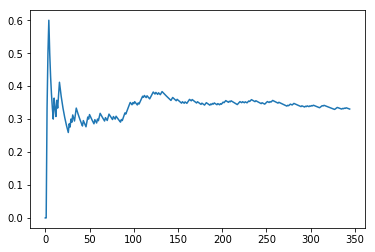

In [158]:
plt.plot(success_rate_m)

In [159]:
result = adfuller(success_rate_m[100:])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.340364
p-value: 0.610510
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


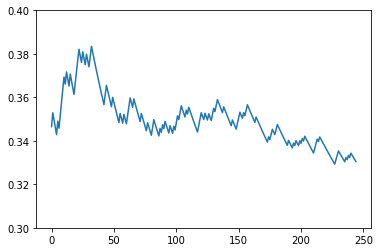

In [160]:
plt.ylim(0.30, 0.4)
plt.plot(success_rate_m[100:])

MERSON IS NOT CONSTANT

# Analysis by team

In [67]:
from collections import Counter

In [69]:
a = Counter(list(df_both_pick.Home) + list(df_both_pick.Away))

In [71]:
a.most_common()

[('Liverpool', 21),
 ('Everton', 20),
 ('Tottenham', 20),
 ('Arsenal', 16),
 ('Sunderland', 16),
 ('Newcastle', 15),
 ('Man United', 15),
 ('West Ham', 15),
 ('West Brom', 15),
 ('Swansea', 14),
 ('Chelsea', 13),
 ('Stoke', 12),
 ('Crystal Palace', 11),
 ('Leicester', 11),
 ('Man City', 11),
 ('Watford', 10),
 ('Bournemouth', 9),
 ('Southampton', 7),
 ('Aston Villa', 5),
 ('Burnley', 5),
 ('Brighton', 5),
 ('Middlesbrough', 3),
 ('QPR', 2),
 ('Norwich', 2),
 ('Hull', 2),
 ('Huddersfield', 2),
 ('Cardiff', 1)]

Hypothesis - their judgement is clouded. Liverpool, Everton Spurs and Arsenal. Check by team

In [73]:
df_both_pick_liverpool = df_both_pick[(df_both_pick.Home == "Liverpool") | (df_both_pick.Away == "Liverpool")]

In [74]:
df_both_pick_everton = df_both_pick[(df_both_pick.Home == "Everton") | (df_both_pick.Away == "Everton")]

In [75]:
df_both_pick_arsenal = df_both_pick[(df_both_pick.Home == "Arsenal") | (df_both_pick.Away == "Arsenal")]

In [76]:
df_both_pick_spurs = df_both_pick[(df_both_pick.Home == "Tottenham") | (df_both_pick.Away == "Tottenham")]

In [83]:
len(df_both_pick_liverpool[df_both_pick_liverpool.predict_draw_success_m & df_both_pick_liverpool.predict_draw_success_l]) /len(df_both_pick_liverpool)

0.3333333333333333

In [80]:
len(df_both_pick_everton[df_both_pick_everton.predict_draw_success_m & df_both_pick_everton.predict_draw_success_l])/len(df_bo)

0.55

In [81]:
len(df_both_pick_arsenal[df_both_pick_arsenal.predict_draw_success_m & df_both_pick_arsenal.predict_draw_success_l])/len(df_both_pick_arsenal)

0.4375

In [84]:
len(df_both_pick_spurs[df_both_pick_spurs.predict_draw_success_m & df_both_pick_spurs.predict_draw_success_l])/len(df_both_pick_spurs)

0.3

In [85]:
len(df_both_pick_spurs[df_both_pick_spurs.predict_draw_success_m & df_both_pick_spurs.predict_draw_success_l])

6

In [86]:
len(df_both_pick_spurs)

20

In [88]:
len(df_both_pick[~((df_both_pick.Home == "Tottenham") | (df_both_pick.Away == "Tottenham"))])

119

Is merson any better or worse with spurs/arsenal?

In [57]:
df_m_pick_arsenal = df_m_pick[(df_m_pick.Home == "Arsenal") | (df_m_pick.Away == "Arsenal")]

In [59]:
len(df_m_pick_arsenal)

23

In [60]:
len(df_m_pick_arsenal[df_m_pick_arsenal.predict_draw_success_m])

8

In [63]:
round(8/23, 2)

0.35

Same as his usual rate of 33%

In [65]:
df_m_pick_spurs = df_m_pick[(df_m_pick.Home == "Tottenham") | (df_m_pick.Away == "Tottenham")]

In [66]:
len(df_m_pick_spurs)

36

In [67]:
len(df_m_pick_spurs[df_m_pick_spurs.predict_draw_success_m])

9

In [68]:
round(9/36, 2)

0.25

seems worse- let's see if it's true

In [72]:
df_m_pick_not_spurs = df_m_pick[~((df_m_pick.Home == "Tottenham") | (df_m_pick.Away == "Tottenham"))]

In [73]:
len(df_m_pick_not_spurs)

304

In [74]:
len(df_m_pick_not_spurs[df_m_pick_not_spurs.predict_draw_success_m])

104

Not significant, p value= .26

Is Lawro any better/worse with l/ e?

In [76]:
df_l_pick_liv = df_l_pick[(df_l_pick.Home == "Liverpool") | (df_l_pick.Away == "Liverpool")]

In [77]:
len(df_l_pick_liv)

58

In [78]:
len(df_l_pick_liv[df_l_pick_liv.predict_draw_success_l])

20

In [79]:
round(20/58, 2)

0.34

Exactly the same as his 34% regular rate

In [80]:
df_l_pick_ev = df_l_pick[(df_l_pick.Home == "Everton") | (df_l_pick.Away == "Everton")]

In [81]:
len(df_l_pick_ev)

50

In [82]:
len(df_l_pick_ev[df_l_pick_ev.predict_draw_success_l])

22

In [83]:
round(22/50, 2)

0.44

A lot better than the usual average! Still not siginifcant though

In [84]:
df_l_pick_not_ev = df_l_pick[~((df_l_pick.Home == "Everton") | (df_l_pick.Away == "Everton"))]

In [85]:
len(df_l_pick_not_ev)

360

In [86]:
len(df_l_pick_not_ev[df_l_pick_not_ev.predict_draw_success_l])

114

In [87]:
len(df_l_pick)

410

p-value is 0.08